<a href="https://colab.research.google.com/github/ejliendov/Proyectos/blob/main/Shopee_FBA_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montando el volumen

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing libreries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import seaborn as sb
import json
from pandas import json_normalize

# Loading dataframe

In [ ]:
# Loading sheet 'Products' and creating table 'Products'
filename = '/content/drive/MyDrive/Colab Notebooks/Shopee_FBA_case_v2.xlsx'
products = pd.read_excel(filename, sheet_name='Products',)
products.head()

,seller_id,product_id,product_price
0,U00196,P00196_004,5.10
1,U00102,P00102_001,25.97
2,U00256,P00256_004,15.61
3,U00380,P00380_003,34.16
4,U00184,P00184_002,11.92


In [ ]:
# Loading sheet 'Orders'
# The next section (Preparing dataframe) will start the process to create the final table 'Orders'
filename = '/content/drive/MyDrive/Colab Notebooks/Shopee_FBA_case_v2.xlsx'
df = pd.read_excel(filename, sheet_name='Orders')
df

,order_id,order_date,order_status,delivery_date,seller_id,buyer_id,product_quantities
0,O00001,2020-12-08,OK,2020-12-20,U00614,U00450,"{""P00614_011"": 3}"
1,O00002,2020-11-01,OK,2020-11-06,U00626,U00595,"{""P00505_002"": 4,\n""P00505_001"": 5,\n""P00505_0..."
2,O00003,2020-11-28,CANCELED,NaT,U00624,U00146,"{""P00624_001"": 2}"
3,O00004,2020-11-12,OK,2020-11-18,U00505,U00578,"{""P00626_001"": 4,\n""P00626_007"": 3,\n""P00626_0..."
4,O00005,2020-12-07,OK,2020-12-18,U00536,U00164,"{""P00536_003"": 2,\n""P00536_002"": 5,\n""P00536_0..."
...,...,...,...,...,...,...,...
8729,O08730,2020-12-04,OK,2020-12-18,U00589,U00117,"{""P00589_001"": 4}"
8730,O08731,2020-11-20,CANCELED,NaT,U00401,U00063,"{""P00401_007"": 3}"
8731,O08732,2020-11-11,OK,2020-11-17,U00589,U00155,"{""P00589_005"": 1,\n""P00589_009"": 4}"
8732,O08733,2020-12-21,OK,2020-12-25,U00551,U00480,"{""P00551_002"": 1,\n""P00551_007"": 3,\n""P00551_0..."


# Preparing dataframe

In [ ]:
# We have noticed that 'product_quinatities' column has duplicate values and
# We had some problems to load as JSON format
# So, we had to handle as text column and split data for what we need to do
# the list 'char' contains character to remove from data
# the list 'rep' contains character to replace it 
char = ['{','\n','"','}']
rep = ['','','','']

In [ ]:
# Doing the replacment
df.product_quantities = df.product_quantities.replace(char,rep,regex=True)
df

,order_id,order_date,order_status,delivery_date,seller_id,buyer_id,product_quantities
0,O00001,2020-12-08,OK,2020-12-20,U00614,U00450,P00614_011: 3
1,O00002,2020-11-01,OK,2020-11-06,U00626,U00595,"P00505_002: 4,P00505_001: 5,P00505_001: 4,P005..."
2,O00003,2020-11-28,CANCELED,NaT,U00624,U00146,P00624_001: 2
3,O00004,2020-11-12,OK,2020-11-18,U00505,U00578,"P00626_001: 4,P00626_007: 3,P00626_005: 4"
4,O00005,2020-12-07,OK,2020-12-18,U00536,U00164,"P00536_003: 2,P00536_002: 5,P00536_005: 2"
...,...,...,...,...,...,...,...
8729,O08730,2020-12-04,OK,2020-12-18,U00589,U00117,P00589_001: 4
8730,O08731,2020-11-20,CANCELED,NaT,U00401,U00063,P00401_007: 3
8731,O08732,2020-11-11,OK,2020-11-17,U00589,U00155,"P00589_005: 1,P00589_009: 4"
8732,O08733,2020-12-21,OK,2020-12-25,U00551,U00480,"P00551_002: 1,P00551_007: 3,P00551_003: 1,P005..."


In [ ]:
# Spliting data in order to get the variables 'products' and 'quantities'
# df1 = Metadata from orders
# df2 = just 'order_id' and 'product_quantities'
df1 = df.drop(columns=['product_quantities'])
df2 = df[['order_id','product_quantities']]

In [ ]:
# Spliting 'products' and 'quantities'
df3 = df2['product_quantities'].str.split('[,:]',expand=True)
# Changing column names
df3 = df3.rename(columns={0:'product_id_1',
                        1:'quantities_1',
                        2:'product_id_2',
                        3:'quantities_2',
                        4:'product_id_3',
                        5:'quantities_3',
                        6:'product_id_4',
                        7:'quantities_4',
                        8:'product_id_5',
                        9:'quantities_5'
                        })
df3

,product_id_1,quantities_1,product_id_2,quantities_2,product_id_3,quantities_3,product_id_4,quantities_4,product_id_5,quantities_5
0,P00614_011,3,None,None,None,None,None,None,None,None
1,P00505_002,4,P00505_001,5,P00505_001,4,P00505_005,1,P00505_005,5
2,P00624_001,2,None,None,None,None,None,None,None,None
3,P00626_001,4,P00626_007,3,P00626_005,4,None,None,None,None
4,P00536_003,2,P00536_002,5,P00536_005,2,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
8729,P00589_001,4,None,None,None,None,None,None,None,None
8730,P00401_007,3,None,None,None,None,None,None,None,None
8731,P00589_005,1,P00589_009,4,None,None,None,None,None,None
8732,P00551_002,1,P00551_007,3,P00551_003,1,P00551_001,1,P00551_008,3


In [ ]:
# Uniting 'order_id' + 'products' + 'quantities'
df4 = pd.concat([df2, df3], axis=1)
df4.head()

,order_id,product_quantities,product_id_1,quantities_1,product_id_2,quantities_2,product_id_3,quantities_3,product_id_4,quantities_4,product_id_5,quantities_5
0,O00001,P00614_011: 3,P00614_011,3,None,None,None,None,None,None,None,None
1,O00002,"P00505_002: 4,P00505_001: 5,P00505_001: 4,P005...",P00505_002,4,P00505_001,5,P00505_001,4,P00505_005,1,P00505_005,5
2,O00003,P00624_001: 2,P00624_001,2,None,None,None,None,None,None,None,None
3,O00004,"P00626_001: 4,P00626_007: 3,P00626_005: 4",P00626_001,4,P00626_007,3,P00626_005,4,None,None,None,None
4,O00005,"P00536_003: 2,P00536_002: 5,P00536_005: 2",P00536_003,2,P00536_002,5,P00536_005,2,None,None,None,None


In [ ]:
# Handling data for final union
p1 = df4[['order_id','product_id_1','quantities_1']].rename(
    columns={'product_id_1':'product_id','quantities_1':'quantities'})
p2 = df4[['order_id','product_id_2','quantities_2']].rename(
    columns={'product_id_2':'product_id','quantities_2':'quantities'})
p3 = df4[['order_id','product_id_3','quantities_3']].rename(
    columns={'product_id_3':'product_id','quantities_3':'quantities'})
p4 = df4[['order_id','product_id_4','quantities_4']].rename(
    columns={'product_id_4':'product_id','quantities_4':'quantities'})
p5 = df4[['order_id','product_id_5','quantities_5']].rename(
    columns={'product_id_5':'product_id','quantities_5':'quantities'})

In [ ]:
# Formating data 
pq = pd.concat([p1,p2,p3,p4,p5])
pq

,order_id,product_id,quantities
0,O00001,P00614_011,3
1,O00002,P00505_002,4
2,O00003,P00624_001,2
3,O00004,P00626_001,4
4,O00005,P00536_003,2
...,...,...,...
8729,O08730,None,None
8730,O08731,None,None
8731,O08732,None,None
8732,O08733,P00551_008,3


In [ ]:
pq['quantities'] = pd.to_numeric(pq['quantities'])

In [ ]:
# Creating final data 'orders_det' which contains order_id, product_id and quantities
pq1 = pq.groupby(['order_id','product_id'])[['quantities']].sum()
pq1.reset_index(inplace=True)
pq1

,order_id,product_id,quantities
0,O00001,P00614_011,3.0
1,O00002,P00505_001,9.0
2,O00002,P00505_002,4.0
3,O00002,P00505_005,6.0
4,O00003,P00624_001,2.0
...,...,...,...
19850,O08733,P00551_003,1.0
19851,O08733,P00551_007,3.0
19852,O08733,P00551_008,3.0
19853,O08734,P00579_004,4.0


In [ ]:
# Creating new table 'Orders_det'
orders_det = pd.merge(df1,pq1)
orders_det

,order_id,order_date,order_status,delivery_date,seller_id,buyer_id,product_id,quantities
0,O00001,2020-12-08,OK,2020-12-20,U00614,U00450,P00614_011,3.0
1,O00002,2020-11-01,OK,2020-11-06,U00626,U00595,P00505_001,9.0
2,O00002,2020-11-01,OK,2020-11-06,U00626,U00595,P00505_002,4.0
3,O00002,2020-11-01,OK,2020-11-06,U00626,U00595,P00505_005,6.0
4,O00003,2020-11-28,CANCELED,NaT,U00624,U00146,P00624_001,2.0
...,...,...,...,...,...,...,...,...
19850,O08733,2020-12-21,OK,2020-12-25,U00551,U00480,P00551_003,1.0
19851,O08733,2020-12-21,OK,2020-12-25,U00551,U00480,P00551_007,3.0
19852,O08733,2020-12-21,OK,2020-12-25,U00551,U00480,P00551_008,3.0
19853,O08734,2020-12-18,OK,2021-01-02,U00579,U00207,P00579_004,4.0


# Tasks

---





# 1) Create a new table Sellers with exactly one line for each unique seller present in table Products. Table Sellers must contain the following columns:


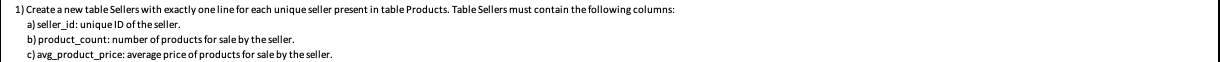

In [ ]:
sellers = products.pivot_table(index='seller_id', 
                               aggfunc={'product_id': 'count', 'product_price': np.mean}).rename(columns={
                                   'product_id':'product_count','product_price':'avg_product_price'})
sellers

,product_count,avg_product_price
seller_id,,
U00001,8,36.430000
U00005,8,44.833750
U00009,4,58.435000
U00011,6,31.665000
U00013,3,54.596667
...,...,...
U00619,1,36.560000
U00620,2,5.765000
U00622,9,31.214444


In [ ]:
# Exporting table
filename1 = '/content/drive/MyDrive/Colab Notebooks/sellers.xlsx'
sellers.to_excel(filename1)

# 2) Create the following new columns in table Orders:

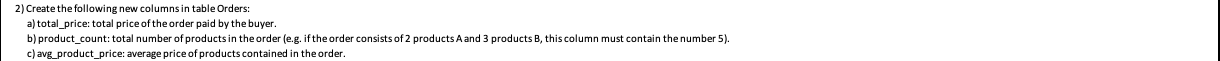

In [ ]:
orders_pre = pd.merge(orders_det, products, on='product_id', how='left')
orders_pre

,order_id,order_date,order_status,delivery_date,seller_id_x,buyer_id,product_id,quantities,seller_id_y,product_price
0,O00001,2020-12-08,OK,2020-12-20,U00614,U00450,P00614_011,3.0,U00614,5.01
1,O00002,2020-11-01,OK,2020-11-06,U00626,U00595,P00505_001,9.0,U00505,5.05
2,O00002,2020-11-01,OK,2020-11-06,U00626,U00595,P00505_002,4.0,U00505,5.27
3,O00002,2020-11-01,OK,2020-11-06,U00626,U00595,P00505_005,6.0,U00505,15.40
4,O00003,2020-11-28,CANCELED,NaT,U00624,U00146,P00624_001,2.0,U00624,42.10
...,...,...,...,...,...,...,...,...,...,...
20127,O08733,2020-12-21,OK,2020-12-25,U00551,U00480,P00551_003,1.0,U00551,79.43
20128,O08733,2020-12-21,OK,2020-12-25,U00551,U00480,P00551_007,3.0,U00551,83.06
20129,O08733,2020-12-21,OK,2020-12-25,U00551,U00480,P00551_008,3.0,U00551,5.01
20130,O08734,2020-12-18,OK,2021-01-02,U00579,U00207,P00579_004,4.0,U00579,42.12


The previous results shows us that table 'products' has duplicated lines because a left join based on table 'orders_det' has more lines than the original table 'orders_det'. So, lets check this situatio in order to get just one line for ecah product in table 'products'

In [ ]:
products2 = products.pivot_table(index='product_id', 
                               aggfunc={'product_price': 'count'}).sort_values('product_price', ascending=False)
products2

,product_price
product_id,
P00023_003,2
P00599_010,2
P00263_002,2
P00614_005,2
P00576_008,2
...,...
P00221_008,1
P00221_007,1
P00221_006,1


We were right and table 'Products' has duplicated lines. Let's unify this table.

In [ ]:
products_unique = products.pivot_table(index='product_id', 
                               aggfunc={'product_price': np.mean})
products_unique

,product_price
product_id,
P00001_001,46.97
P00001_002,8.55
P00001_003,43.16
P00001_004,21.87
P00001_005,64.08
...,...
P00626_004,5.01
P00626_005,5.01
P00626_006,5.02


In [ ]:
orders_pre = pd.merge(orders_det, products_unique, on='product_id', how='left')
orders_pre['total_price'] = orders_pre['quantities']*orders_pre['product_price']
orders_pre

,order_id,order_date,order_status,delivery_date,seller_id,buyer_id,product_id,quantities,product_price,total_price
0,O00001,2020-12-08,OK,2020-12-20,U00614,U00450,P00614_011,3.0,5.01,15.03
1,O00002,2020-11-01,OK,2020-11-06,U00626,U00595,P00505_001,9.0,5.05,45.45
2,O00002,2020-11-01,OK,2020-11-06,U00626,U00595,P00505_002,4.0,5.27,21.08
3,O00002,2020-11-01,OK,2020-11-06,U00626,U00595,P00505_005,6.0,15.40,92.40
4,O00003,2020-11-28,CANCELED,NaT,U00624,U00146,P00624_001,2.0,42.10,84.20
...,...,...,...,...,...,...,...,...,...,...
19850,O08733,2020-12-21,OK,2020-12-25,U00551,U00480,P00551_003,1.0,79.43,79.43
19851,O08733,2020-12-21,OK,2020-12-25,U00551,U00480,P00551_007,3.0,83.06,249.18
19852,O08733,2020-12-21,OK,2020-12-25,U00551,U00480,P00551_008,3.0,5.01,15.03
19853,O08734,2020-12-18,OK,2021-01-02,U00579,U00207,P00579_004,4.0,42.12,168.48


In [ ]:
orders_total = orders_pre.pivot_table(index='order_id', 
                               aggfunc={'quantities': np.sum, 'total_price': np.sum}).rename(
                                   columns={'quantities':'product_count'})
orders_total['avg_product_price'] = orders_total['total_price']/orders_total['product_count']
orders_total.reset_index(inplace=True)
orders_total

,order_id,product_count,total_price,avg_product_price
0,O00001,3.0,15.03,5.010000
1,O00002,19.0,158.93,8.364737
2,O00003,2.0,84.20,42.100000
3,O00004,11.0,97.45,8.859091
4,O00005,9.0,150.31,16.701111
...,...,...,...,...
8729,O08730,4.0,20.28,5.070000
8730,O08731,3.0,42.63,14.210000
8731,O08732,5.0,85.87,17.174000
8732,O08733,9.0,392.57,43.618889


In [ ]:
# Finally we got the table 'Orders' as required
orders = pd.merge(df,orders_total)
orders

,order_id,order_date,order_status,delivery_date,seller_id,buyer_id,product_quantities,product_count,total_price,avg_product_price
0,O00001,2020-12-08,OK,2020-12-20,U00614,U00450,"{""P00614_011"": 3}",3.0,15.03,5.010000
1,O00002,2020-11-01,OK,2020-11-06,U00626,U00595,"{""P00505_002"": 4,\n""P00505_001"": 5,\n""P00505_0...",19.0,158.93,8.364737
2,O00003,2020-11-28,CANCELED,NaT,U00624,U00146,"{""P00624_001"": 2}",2.0,84.20,42.100000
3,O00004,2020-11-12,OK,2020-11-18,U00505,U00578,"{""P00626_001"": 4,\n""P00626_007"": 3,\n""P00626_0...",11.0,97.45,8.859091
4,O00005,2020-12-07,OK,2020-12-18,U00536,U00164,"{""P00536_003"": 2,\n""P00536_002"": 5,\n""P00536_0...",9.0,150.31,16.701111
...,...,...,...,...,...,...,...,...,...,...
8729,O08730,2020-12-04,OK,2020-12-18,U00589,U00117,"{""P00589_001"": 4}",4.0,20.28,5.070000
8730,O08731,2020-11-20,CANCELED,NaT,U00401,U00063,"{""P00401_007"": 3}",3.0,42.63,14.210000
8731,O08732,2020-11-11,OK,2020-11-17,U00589,U00155,"{""P00589_005"": 1,\n""P00589_009"": 4}",5.0,85.87,17.174000
8732,O08733,2020-12-21,OK,2020-12-25,U00551,U00480,"{""P00551_002"": 1,\n""P00551_007"": 3,\n""P00551_0...",9.0,392.57,43.618889


In [ ]:
# Exporting table
filename2 = '/content/drive/MyDrive/Colab Notebooks/orders.xlsx'
orders.to_excel(filename2,)

# 3) Calculate the average of:

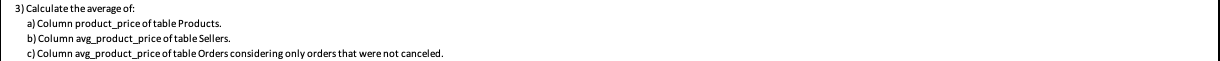

In [ ]:
# a) avg_product_price (app) from table 'Products'
app_products = products['product_price'].describe()['mean']
print(app_products)

25.83548744460856


In [ ]:
# b) avg_product_price (app) from table 'Sellers'
app_sellers = sellers['avg_product_price'].describe()['mean']
print(app_sellers)

29.63065642582602


In [ ]:
# c) avg_product_price (app) from table 'Orders'
filter1 = orders['order_status']!='CANCELED'
filter2 = orders[filter]
app_orders = filter2['avg_product_price'].describe()['mean']
print(app_orders)

21.12466979738531


# 4) Explain what results obtained in items 3a), 3b) and 3c) represent. How would you justify the differences between them? Does this showcase any trends in seller and/or customer behavior?



1.   3a) Is just the average of the target price of each product for sale. Really doesn't mean anything useful by itself
2.   3b) Is the average of the average target price of the products that a seller sells. Like the previous point doesn't mean anything really useful by itself 
3.   3c) Is the average of the sellers' average selling price per product.

The first 2 averages 3a) and 3b) are based on target prices, therefore they do not represent the actual behavior of sales. However, they can serve as an initial parameter, since when looking at the relationship between 3a) 3b) and 3c) we can see that 3c) is lower, so we can conclude that the best selling products are those whose prices are lower than the average target price.


# 5) Build a simple dashboard showcasing the most important information contained in the tables. Feel free to create additional support tables or columns if needed.

In [ ]:
# 1) Let's see sales/products list
base1 = orders_pre.pivot_table(index='product_id', 
                               aggfunc={'total_price': np.sum,
                                        'quantities': np.sum,
                                        'product_price': np.mean}).sort_values(by='total_price', ascending=False)
base1

,product_price,quantities,total_price
product_id,,,
P00617_001,82.07,299.0,24538.93
P00626_002,86.62,274.0,23733.88
P00622_007,88.90,233.0,20713.70
P00626_003,77.04,247.0,19028.88
P00617_011,74.89,249.0,18647.61
...,...,...,...
P00311_006,NaN,19.0,0.00
P00259_001,NaN,14.0,0.00
P00614_010,NaN,241.0,0.00


Here we can notice few things:


*   The product 'P00617_001' is the best selling based on total_prices and quantities as well.
*   This product is not the chepeast but the most expensive neither. Actually, looks like expensive one.  
*   We can notice that there are products witn no prices, which indicate these products are not in the table 'products'
*   This situation could be affecting estimation of total_price



In [ ]:
# 2) Let's top10 best selling products
top10 = base1.nlargest(10,'total_price').sort_values('total_price', ascending=False)
top10

,product_price,quantities,total_price
product_id,,,
P00617_001,82.07,299.0,24538.93
P00626_002,86.62,274.0,23733.88
P00622_007,88.90,233.0,20713.70
P00626_003,77.04,247.0,19028.88
P00617_011,74.89,249.0,18647.61
P00605_010,81.58,226.0,18437.08
P00614_005,67.80,221.0,14983.80
P00614_007,58.08,250.0,14520.00
P00622_001,59.21,245.0,14506.45


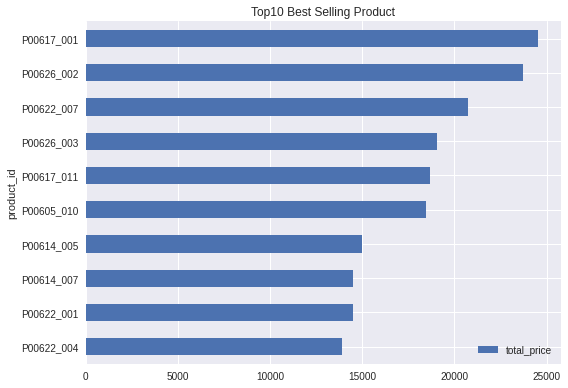

In [ ]:
plt.style.use('seaborn')
top10 = base1.nlargest(10,'total_price').sort_values('total_price', ascending=True)
plot_top10 = top10.plot.barh(y='total_price', title='Top10 Best Selling Product')
# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()

In [ ]:
# 2) Let's see what we can say about the canceled orders
base2 = orders.pivot_table(index='order_status', 
                               aggfunc={'avg_product_price': np.mean,
                                        'product_count': np.mean})
base2

,avg_product_price,product_count
order_status,,
CANCELED,21.394009,8.371145
OK,21.124670,8.352848


 
*   There seems to be no difference between canceled and finished orders about price and quantities.

*   The canceled orders represent 20.97%


In [361]:
# 2)
pd.crosstab(orders.seller_id, orders.order_status, margins=True, normalize='index').sort_values(
    by='CANCELED', ascending=False)

order_status,CANCELED,OK
seller_id,,
U00144,1.000000,0.000000
U00308,1.000000,0.000000
U00161,1.000000,0.000000
U00351,1.000000,0.000000
U00460,0.714286,0.285714
...,...,...
U00228,0.000000,1.000000
U00232,0.000000,1.000000
U00181,0.000000,1.000000


The seller who has most canceled orders is U00144 with 100%

In [362]:
# 3)
pd.crosstab(orders.buyer_id, orders.order_status, margins=True, normalize='index').sort_values(
    by='CANCELED', ascending=False)

order_status,CANCELED,OK
buyer_id,,
U00421,0.666667,0.333333
U00586,0.583333,0.416667
U00612,0.571429,0.428571
U00042,0.538462,0.461538
U00070,0.500000,0.500000
...,...,...
U00238,0.000000,1.000000
U00558,0.000000,1.000000
U00041,0.000000,1.000000


The buyer who has most canceled orders is 'U00421'